# Here we wanna check if the target column (SalePrice) is skewed and visualizing to know if we need a log-transform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Now, let Load Kaggle training data

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Here, we're extractin target column

In [ ]:
y = df["SalePrice"] # Here is the target column
print("Number of samples:", len(y))


Number of samples: 1460


# Now, let's Plot the raw Target (SalePrice) distribution

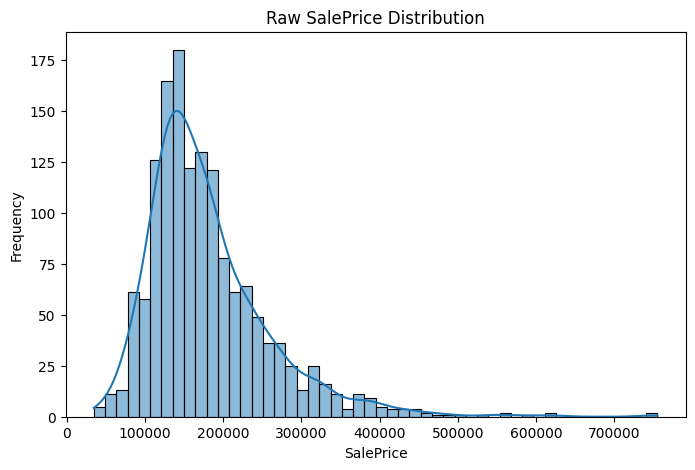

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(y, bins=50, kde=True)
plt.title("Raw SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


# let Compute skewness

## Skewness measures asymmetry of a distribution.

| Skewness value | Meaning                                |
| -------------- | -------------------------------------- |
| ~0             | symmetric (good for linear regression) |
| > 1            | highly right-skewed (problematic) , so NEED A LOG TRANSFORM     |


If extreme values (Saleprice) are:

    larger than most data → right-skew

    smaller than most data → left-skew


So in this case, we see that , it's right-skew cause we have some extreme Saleprice like, 550 000, 620 000, and around 800 000

In [5]:
print("Skewness:", skew(y))


Skewness: 1.880940746034036


# Plot log-transformed Target (SalePrice)

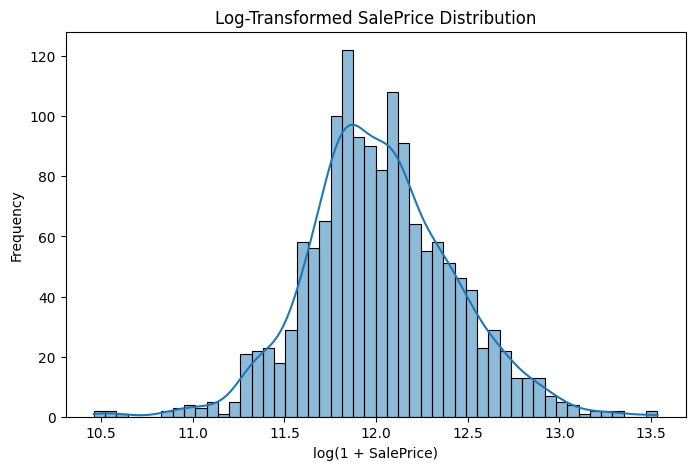

In [6]:
y_log = np.log1p(y) # Hee i'm applying the log transformation to the y

plt.figure(figsize=(8,5))
sns.histplot(y_log, bins=50, kde=True)
plt.title("Log-Transformed SalePrice Distribution")
plt.xlabel("log(1 + SalePrice)")
plt.ylabel("Frequency")
plt.show()


# Skewness after log

In [7]:
print("Skewness after log:", skew(y_log))


Skewness after log: 0.12122191311528359
